In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [45]:
df1_train = pd.read_pickle("./df1_train.pkl")
df1_test  = pd.read_pickle("./df1_test.pkl")

df2_train = pd.read_pickle("./df2_train.pkl")
df2_test  = pd.read_pickle("./df2_test.pkl")
print(str(len(df1_train))+" "+str(len(df1_test))+" || "+str(len(df2_train))+" "+str(len(df2_test)))

2644 689 || 5605 1416


In [46]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=21, min_samples_leaf=21) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [47]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 21, min_samples_leaf = 21) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [50]:
# Driver code 
def run_decision_tree(df_train, df_test): 
      
 
    X_train = df_train.iloc[:,:-1]
    y_train = df_train.iloc[:,-1:]
    X_test  = df_test.iloc[:,:-1]
    y_test  = df_test.iloc[:,-1:] 
    
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      

      
    # Prediction using gini 
    y_pred_train_gini = clf_gini.predict(X_train) 
    y_pred_test_gini = clf_gini.predict(X_test)
     
      
     
    # Prediction using entropy 
    y_pred_train_entropy = clf_entropy.predict(X_train)
    y_pred_test_entropy = clf_entropy.predict(X_test) 
     
    #************************************************************************************
    #Confusion Matrix
    #************************************************************************************
    
    #Using Gini
    #**********
    cnf_matrix_train   = metrics.confusion_matrix(y_train, y_pred_train_gini)
    cnf_matrix_test    = metrics.confusion_matrix(y_test , y_pred_test_gini)
    cnf_matrix_train   = cnf_matrix_train/len(df_train)
    cnf_matrix_test    = cnf_matrix_test/len(df_test)
    
    class_names=[0,1]
    
    print("Confusion Matrix Training set Using Gini")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("Confusion Matrix Test set Using Gini")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("=================On test set=================")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test_gini))
    print("Precision:",metrics.precision_score(y_test, y_pred_test_gini))
    print("Recall:",metrics.recall_score(y_test, y_pred_test_gini))
    
    print("*******************************************************************************")
    #Using Entropy
    #*************
    cnf_matrix_train   = metrics.confusion_matrix(y_train, y_pred_train_entropy)
    cnf_matrix_test    = metrics.confusion_matrix(y_test , y_pred_test_entropy)
    cnf_matrix_train   = cnf_matrix_train/len(df_train)
    cnf_matrix_test    = cnf_matrix_test/len(df_test)
    
    class_names=[0,1]
    
    print("Confusion Matrix Training set Using Entropy")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("Confusion Matrix Test set Using Entropy")
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("=================On test set=================")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test_entropy))
    print("Precision:",metrics.precision_score(y_test, y_pred_test_entropy))
    print("Recall:",metrics.recall_score(y_test, y_pred_test_entropy))
    
    return
         

********************************** Data Frame 1 **********************************
Confusion Matrix Training set Using Gini


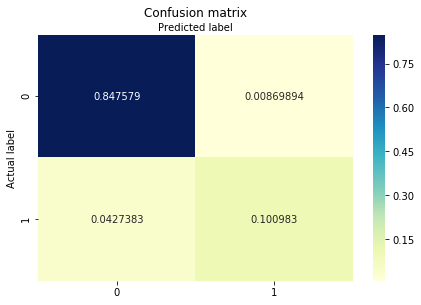

Confusion Matrix Test set Using Gini


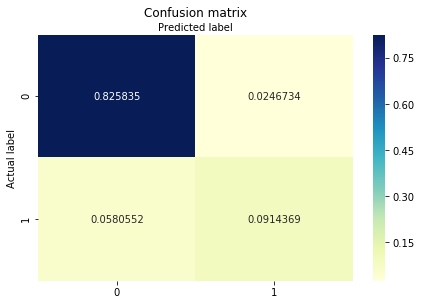

=================On test set=================
Accuracy: 0.9172714078374455
Precision: 0.7875
Recall: 0.6116504854368932
*******************************************************************************
Confusion Matrix Training set Using Entropy


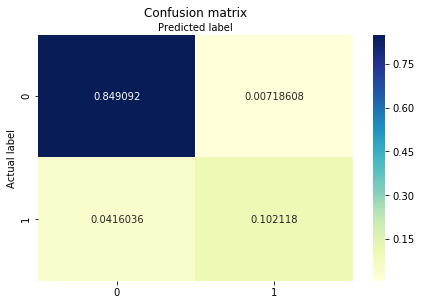

Confusion Matrix Test set Using Entropy


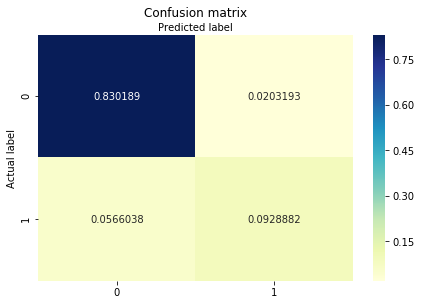

=================On test set=================
Accuracy: 0.9230769230769231
Precision: 0.8205128205128205
Recall: 0.6213592233009708
********************************** Data Frame 2 **********************************
Confusion Matrix Training set Using Gini


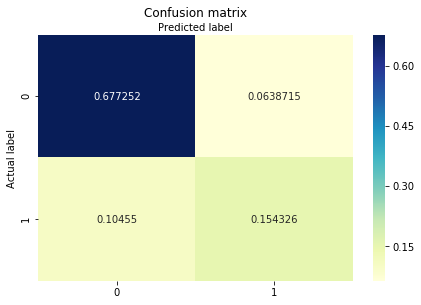

Confusion Matrix Test set Using Gini


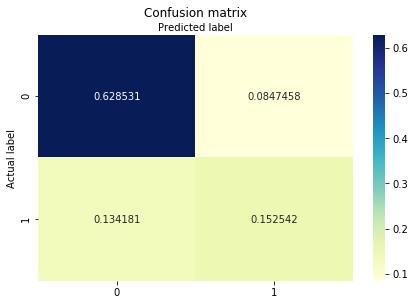

=================On test set=================
Accuracy: 0.7810734463276836
Precision: 0.6428571428571429
Recall: 0.5320197044334976
*******************************************************************************
Confusion Matrix Training set Using Entropy


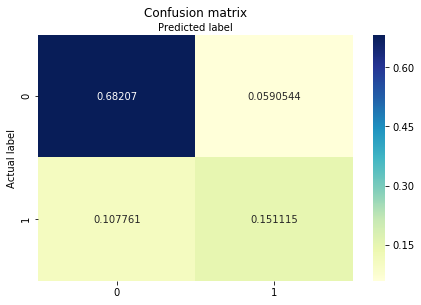

Confusion Matrix Test set Using Entropy


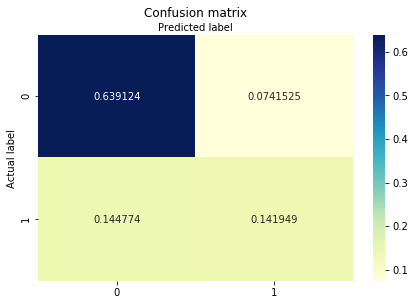

=================On test set=================
Accuracy: 0.7810734463276836
Precision: 0.6568627450980392
Recall: 0.49507389162561577


In [51]:
print("********************************** Data Frame 1 **********************************")
run_decision_tree(df1_train, df1_test)

print("********************************** Data Frame 2 **********************************")
run_decision_tree(df2_train, df2_test)